In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

            Análisis de datos (indicadores de salud) creando relaciones indirectas con los flujos migratorios

-- En este EDA trabajaremos con el dataset de indicadores de salud ya normalizado. Haciendo análisis en los indicadores de nuestro interes.


In [3]:
data_salud = pd.read_csv('indicador_de_salud_normalizado.csv')

In [98]:
inmigrantes = pd.read_csv('L-Total_inmigrantes_DESTINO_normal.csv')

In [101]:
emigrantes = pd.read_csv('L-Total_emigrantes_ORIGEN_normal.csv')

In [107]:
emigrantes['Region, development group, country or area'].sort_values(ascending=True).tail(20)

61                         turkmenistan
185            turks and caicos islands
238                              tuvalu
16                               uganda
120                             ukraine
109                united arab emirates
133                      united kingdom
17          united republic of tanzania
213            united states of america
186        united states virgin islands
207                             uruguay
62                           uzbekistan
221                             vanuatu
208    venezuela bolivarian republic of
81                              vietnam
92                         western asia
35                       western sahara
110                               yemen
18                               zambia
19                             zimbabwe
Name: Region, development group, country or area, dtype: object

In [102]:
emigrantes.head()

,"Region, development group, country or area",Location code,1990,1995,2000,2005,2010,2015,2020
0,burundi,108,337100,540558,758673,619916,284078,459979,551105
1,comoros,174,40079,51290,70502,96143,109125,121749,150823
2,djibouti,262,5308,6964,9055,11987,13797,16969,18365
3,eritrea,232,170603,375257,511506,299311,328366,624757,802822
4,ethiopia,231,1689941,816420,445886,524038,680290,842496,946129


In [4]:
data_salud.head()

,Country Name,Country Code,Series Name,1990,1995,2000,2005,2010,2015,2020,cod
0,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",162.8354,164.7084,153.951,138.4284,113.715,81.693,57.509,1
1,Afghanistan,AFG,Adults (ages 15+) living with HIV,500.0000,890.0000,1600.000,2800.0000,4200.000,6600.000,9600.000,1
2,Afghanistan,AFG,Adults (ages 15-49) newly infected with HIV,100.0000,200.0000,500.000,500.0000,1000.000,1000.000,1100.000,1
3,Afghanistan,AFG,Children with fever receiving antimalarial dru...,0.0000,0.0000,0.000,0.0000,0.000,11.800,0.000,1
4,Afghanistan,AFG,"Community health workers (per 1,000 people)",0.0000,0.0000,0.000,0.0000,0.000,0.000,0.000,1


In [5]:
data_salud.shape

(6510, 11)

In [6]:
data_salud.drop(columns={'Country Code'}, inplace=True)

In [7]:
data_cod = data_salud['cod']

In [8]:
data_salud.drop(columns={'cod'},inplace=True)

In [9]:
data_salud

,Country Name,Series Name,1990,1995,2000,2005,2010,2015,2020
0,Afghanistan,"Adolescent fertility rate (births per 1,000 wo...",162.8354,164.7084,153.951,138.4284,113.715,81.693,57.509
1,Afghanistan,Adults (ages 15+) living with HIV,500.0000,890.0000,1600.000,2800.0000,4200.000,6600.000,9600.000
2,Afghanistan,Adults (ages 15-49) newly infected with HIV,100.0000,200.0000,500.000,500.0000,1000.000,1000.000,1100.000
3,Afghanistan,Children with fever receiving antimalarial dru...,0.0000,0.0000,0.000,0.0000,0.000,11.800,0.000
4,Afghanistan,"Community health workers (per 1,000 people)",0.0000,0.0000,0.000,0.0000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
6505,Zimbabwe,Prevalence of overweight (% of children under 5),0.0000,0.0000,0.000,8.8000,5.800,5.600,0.000
6506,Zimbabwe,Prevalence of undernourishment (% of population),0.0000,0.0000,0.000,0.0000,0.000,0.000,0.000
6507,Zimbabwe,Probability of dying among youth ages 20-24 ye...,14.6000,20.6000,24.600,23.0000,19.400,16.400,14.700
6508,Zimbabwe,Probability of dying among children ages 5-9 y...,8.4000,8.4000,8.600,8.9000,8.100,5.700,4.000


In [10]:
data_transpuesta = (
    data_salud.set_index(["Country Name", "Series Name"])
    .rename_axis("year", axis=1)
    .stack()
    .unstack(1)
    .sort_values(['Country Name','year'])
    .reset_index()
    .rename_axis(None, axis=1)
    .rename_axis("id")
)

In [11]:
data_transpuesta

,Country Name,year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) living with HIV,Adults (ages 15-49) newly infected with HIV,Children with fever receiving antimalarial drugs (% of children under age 5 with fever),"Community health workers (per 1,000 people)",Current health expenditure per capita (current US$),"Death rate, crude (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),...,"Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)","Mortality rate, infant (per 1,000 live births)",People using at least basic drinking water services (% of population),Pregnant women receiving prenatal care (%),Prevalence of overweight (% of adults),Prevalence of overweight (% of children under 5),Prevalence of undernourishment (% of population),"Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)","Tuberculosis death rate (per 100,000 people)"
id,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,1990,162.8354,500.0,100.0,0.0,0.0,0.000000,18.449,0.0,...,0.0,120.8,0.000000,0.0,10.4,0.0,0.0,12.3,35.1,0.0
1,Afghanistan,1995,164.7084,890.0,200.0,0.0,0.0,0.000000,14.092,0.0,...,0.0,103.9,0.000000,0.0,12.1,0.0,0.0,8.8,24.1,0.0
2,Afghanistan,2000,153.9510,1600.0,500.0,0.0,0.0,0.000000,12.096,0.0,...,0.0,90.5,28.171415,36.9,14.2,0.0,0.0,6.6,15.9,68.0
3,Afghanistan,2005,138.4284,2800.0,500.0,0.0,0.0,23.890501,9.941,0.0,...,0.0,77.3,36.401501,0.0,16.6,0.0,36.1,5.9,11.4,47.0
4,Afghanistan,2010,113.7150,4200.0,1000.0,0.0,0.0,44.990532,8.254,0.0,...,0.0,64.2,48.287084,59.6,19.3,0.0,21.2,5.6,12.6,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,Zimbabwe,2000,100.2418,1400000.0,86000.0,0.0,0.0,0.000000,16.801,0.0,...,0.0,51.9,71.869387,0.0,30.4,0.0,0.0,8.6,24.6,28.0
1515,Zimbabwe,2005,106.7950,1200000.0,67000.0,0.0,0.0,0.000000,16.820,0.0,...,0.0,51.7,70.163108,0.0,33.3,8.8,0.0,8.9,23.0,32.0
1516,Zimbabwe,2010,109.7422,1100000.0,56000.0,0.0,0.0,99.348557,13.281,0.0,...,0.0,52.1,67.540711,0.0,35.7,5.8,0.0,8.1,19.4,8.9


Una vez transpuestas las columnas paso analizar los diferentes indicadores

--------Analisis de las diferentes condiciones por pais durante los años 1990-1995-2000-2005-2010-2015-2020

In [12]:
data_transpuesta['year'].unique()

array(['1990', '1995', '2000', '2005', '2010', '2015', '2020'],
      dtype=object)

Se haran varios filtros por la cantidad de los distintos años en el dataframe

In [13]:
filtro1990 = data_transpuesta[(data_transpuesta['year'] == '1990')] 

In [14]:
filtro1995 =data_transpuesta[(data_transpuesta['year'] == '1995')]

In [15]:
filtro2000 = data_transpuesta[(data_transpuesta['year'] == '2000')]

In [16]:
filtro2005 = data_transpuesta[(data_transpuesta['year'] == '2005')]

In [17]:
filtro2010 = data_transpuesta[(data_transpuesta['year'] == '2010')]

In [18]:
filtro2015 = data_transpuesta[(data_transpuesta['year'] == '2015')]

In [19]:
filtro2020 = data_transpuesta[(data_transpuesta['year'] == '2020')]

            Filtrando por la media de la tasa de fecundidad adolescente (nacimientos por cada 1000 mujeres de 15 a 19 años)

In [20]:
total_1990 = (
    filtro1990
    .groupby('Country Name')['Adolescent fertility rate (births per 1,000 women ages 15-19)']
    .mean()
    .reset_index()
    .sort_values(by='Adolescent fertility rate (births per 1,000 women ages 15-19)',ascending=False)
)

In [21]:
total_1990.head()

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
142,Niger,223.6904
37,Chad,218.0928
5,Angola,216.6000
121,Mali,195.5498
59,Equatorial guinea,192.8120


In [24]:
total_2000 = (
    filtro2000
    .groupby('Country Name')['Adolescent fertility rate (births per 1,000 women ages 15-19)']
    .mean()
    .reset_index()
    .sort_values(by='Adolescent fertility rate (births per 1,000 women ages 15-19)',ascending=False)
)

In [25]:
total_2000.head()

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
142,Niger,217.1594
37,Chad,212.4100
5,Angola,196.6992
121,Mali,188.1362
133,Mozambique,183.1252


In [32]:
total_2020 = (
    filtro2020
    .groupby('Country Name')['Adolescent fertility rate (births per 1,000 women ages 15-19)']
    .mean()
    .reset_index()
    .sort_values(by='Adolescent fertility rate (births per 1,000 women ages 15-19)',ascending=False)
)

In [33]:
total_2020.head()

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
142,Niger,177.4642
121,Mali,162.3464
37,Chad,151.5632
59,Equatorial guinea,149.1132
5,Angola,142.8220




Los paises que más indices de nacimiento tienen entre los 15 y 19 años son Nigeria, Mali, Chad, Equatorial Guinea y Angola.

Cabe mencionar que desde 1990 hasta 2020 los números de nacimientos con respecto a esta condición a venido  disminuyendo

In [34]:
##Vizualizacion del top15 de paises con mayor tasa de fertilidad por cada 1000 mujeres en la edad de 15 a 19 años
total_popul_df = (
    filtro1990
    .groupby('Country Name')['Adolescent fertility rate (births per 1,000 women ages 15-19)']
    .mean()
    .reset_index()
    .sort_values(by='Adolescent fertility rate (births per 1,000 women ages 15-19)',ascending=False)
).head(16)

<AxesSubplot: ylabel='Adolescent fertility rate (births per 1,000 women ages 15-19)'>

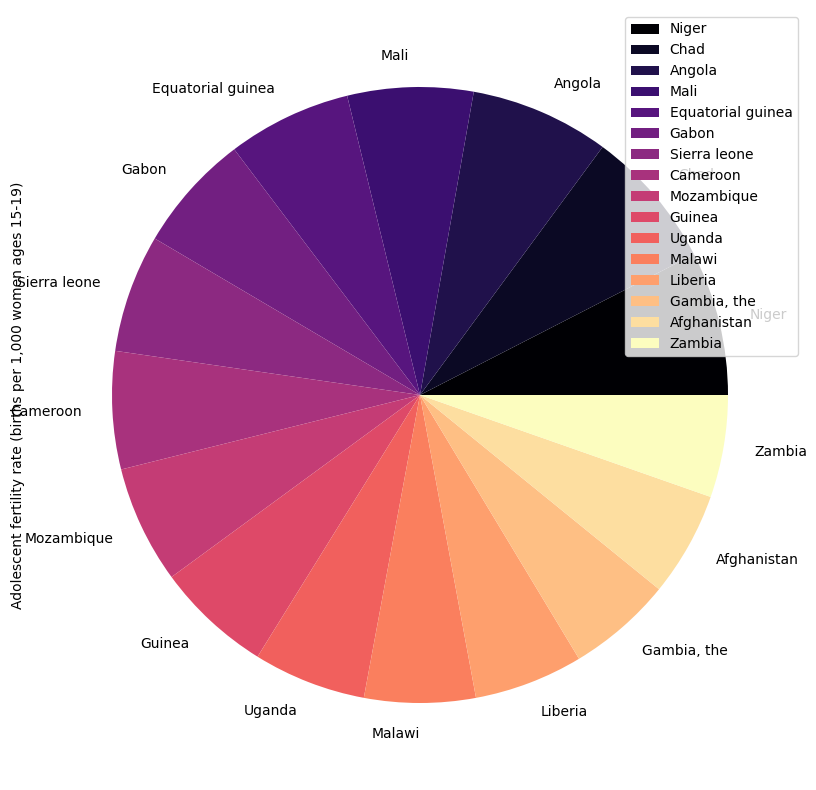

In [35]:
total_popul_df.set_index('Country Name').plot.pie(y='Adolescent fertility rate (births per 1,000 women ages 15-19)', figsize=(10,10),colormap='magma')

                            Filtrando por la media de la probabilidad de morir entre los niños de 5 a 9 años (por 1000)

In [36]:
serie2_1990 = (
    filtro1990
    .groupby('Country Name')['Probability of dying among children ages 5-9 years (per 1,000)']
    .mean()
    .reset_index()
    .sort_values(by='Probability of dying among children ages 5-9 years (per 1,000)', ascending=False)
)

In [37]:
serie2_1990.head()

,Country Name,"Probability of dying among children ages 5-9 years (per 1,000)"
63,Ethiopia,52.8
142,Niger,49.1
161,Rwanda,40.9
133,Mozambique,40.3
30,Burundi,40.1


In [38]:
serie2_1995 = (
    filtro1995
    .groupby('Country Name')['Probability of dying among children ages 5-9 years (per 1,000)']
    .mean()
    .reset_index()
    .sort_values(by='Probability of dying among children ages 5-9 years (per 1,000)', ascending=False)
)

In [39]:
serie2_1995.head()

,Country Name,"Probability of dying among children ages 5-9 years (per 1,000)"
161,Rwanda,63.8
30,Burundi,44.8
142,Niger,41.8
63,Ethiopia,40.1
5,Angola,32.3


Podemos apreciar como Rwanda pasa a estar en el primer nivel en numero de muertes esto se debe quizas a los eventos historicos que ocurrienron desde 1994 en esta region donde aproximadamente 800.000 personas fueron asesinadas en apenas cien días y otras dos millones huyeron del país (según google)

Considerar ver el flujo de migrantes de este pais durante este año

In [156]:
filtro_migrantes_rwanda = emigrantes[emigrantes['Region, development group, country or area'] == 'rwanda']

In [157]:
filtro_migrantes_rwanda.head() ##Stock de migrantes: (pais de origen Rwanda)

,"Region, development group, country or area",Location code,1990,1995,2000,2005,2010,2015,2020
12,rwanda,646,547717,2060363,318198,289100,334244,503667,492489


C:\Users\USER\AppData\Local\Temp\ipykernel_17692\834124877.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


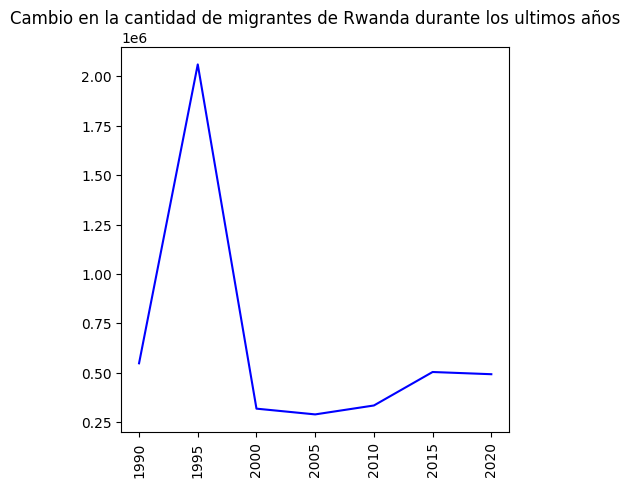

In [181]:
fig, ax = plt.subplots(figsize=(5,5))

rwanda = filtro_migrantes_rwanda.loc[filtro_migrantes_rwanda['Region, development group, country or area'] == 'rwanda', '1990':'2020']
ax.plot(rwanda.values[0], color='blue')
ax.set_title('Cambio en la cantidad de migrantes de Rwanda durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.show()

Podemos apreciar visualmente como el indicador de la probabilidad de morir entre los 5 -9 años afecto de manera indirecta a la poblacion en Rwanda aumentando así el flujo de migrantes durante el año 1995

In [40]:
serie2_2000 = (
    filtro2000
    .groupby('Country Name')['Probability of dying among children ages 5-9 years (per 1,000)']
    .mean()
    .reset_index()
    .sort_values(by='Probability of dying among children ages 5-9 years (per 1,000)', ascending=False)
)

In [41]:
serie2_2000.head()

,Country Name,"Probability of dying among children ages 5-9 years (per 1,000)"
30,Burundi,39.2
161,Rwanda,34.9
142,Niger,33.7
5,Angola,29.6
63,Ethiopia,29.3


In [42]:
serie2_2005 = (
    filtro2005
    .groupby('Country Name')['Probability of dying among children ages 5-9 years (per 1,000)']
    .mean()
    .reset_index()
    .sort_values(by='Probability of dying among children ages 5-9 years (per 1,000)', ascending=False)
)

In [43]:
serie2_2005.head()

,Country Name,"Probability of dying among children ages 5-9 years (per 1,000)"
142,Niger,26.9
175,Somalia,24.8
30,Burundi,24.0
5,Angola,23.8
37,Chad,22.5


In [44]:
serie2_2010 = (
    filtro2010
    .groupby('Country Name')['Probability of dying among children ages 5-9 years (per 1,000)']
    .mean()
    .reset_index()
    .sort_values(by='Probability of dying among children ages 5-9 years (per 1,000)', ascending=False)
)

In [45]:
serie2_2005.head()

,Country Name,"Probability of dying among children ages 5-9 years (per 1,000)"
142,Niger,26.9
175,Somalia,24.8
30,Burundi,24.0
5,Angola,23.8
37,Chad,22.5


In [46]:
serie2_2010 = (
    filtro2010
    .groupby('Country Name')['Probability of dying among children ages 5-9 years (per 1,000)']
    .mean()
    .reset_index()
    .sort_values(by='Probability of dying among children ages 5-9 years (per 1,000)', ascending=False)
)

In [47]:
serie2_2010.head()

,Country Name,"Probability of dying among children ages 5-9 years (per 1,000)"
83,Haiti,100.7
175,Somalia,25.2
142,Niger,22.1
37,Chad,19.0
36,Central african republic,17.8


Podemos apreciar como Haiti se posiciona en el primer país con mas muertes en niños de 5 - 9 años según los eventos historicos en este año hubo un terremoto que dejo más de 360000 muertes y aproximadamente 1500000 damnificados se deberia ver el flujo migratorio para este pais despues de estos eventos

In [48]:
serie2_2015 = (
    filtro2015
    .groupby('Country Name')['Probability of dying among children ages 5-9 years (per 1,000)']
    .mean()
    .reset_index()
    .sort_values(by='Probability of dying among children ages 5-9 years (per 1,000)', ascending=False)
)

In [49]:
serie2_2015.head()

,Country Name,"Probability of dying among children ages 5-9 years (per 1,000)"
175,Somalia,19.0
142,Niger,18.7
36,Central african republic,17.3
169,Sierra leone,16.8
37,Chad,15.9


In [50]:
serie2_2020 = (
    filtro2020
    .groupby('Country Name')['Probability of dying among children ages 5-9 years (per 1,000)']
    .mean()
    .reset_index()
    .sort_values(by='Probability of dying among children ages 5-9 years (per 1,000)', ascending=False)
)

In [51]:
serie2_2020.head()

,Country Name,"Probability of dying among children ages 5-9 years (per 1,000)"
175,Somalia,16.1
169,Sierra leone,15.9
142,Niger,15.7
36,Central african republic,15.7
143,Nigeria,14.1


Los paises con mas probabilidad de morir en infantes desde los 5 a 9 años son Somalia, Sierra Leone, Niger y Nigeria 

Evaluar el flujo de emigrantes de paises como estos es muy probable de que la población quiera huir de estos paises buscando una mejor calidad de vida

In [148]:
filtro_regiones = emigrantes[(emigrantes['Region, development group, country or area'] == 'somalia') |
                             (emigrantes['Region, development group, country or area'] == 'sierra leone') |
                             (emigrantes['Region, development group, country or area'] == 'niger') |
                             (emigrantes['Region, development group, country or area'] == 'nigeria') |
                             (emigrantes['Region, development group, country or area'] == 'haiti') |
                             (emigrantes['Region, development group, country or area'] == 'chad')]

C:\Users\USER\AppData\Local\Temp\ipykernel_17692\1041881466.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


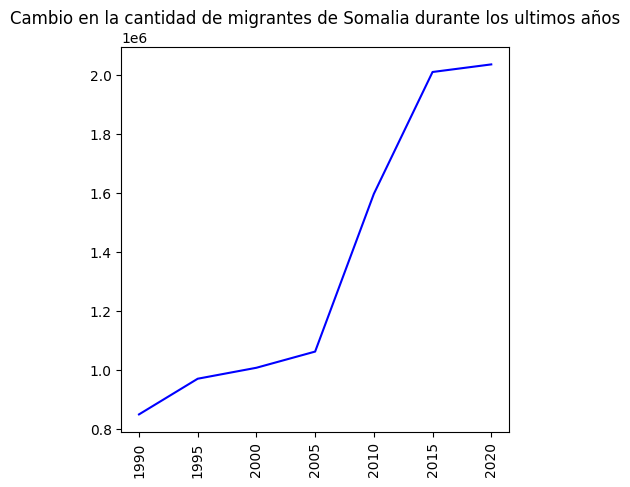

In [184]:
fig, ax = plt.subplots(figsize=(5,5))

somalia = filtro_regiones.loc[filtro_regiones['Region, development group, country or area'] == 'somalia', '1990':'2020']
ax.plot(somalia.values[0], color='blue')
ax.set_title('Cambio en la cantidad de migrantes de Somalia durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17692\3678540315.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


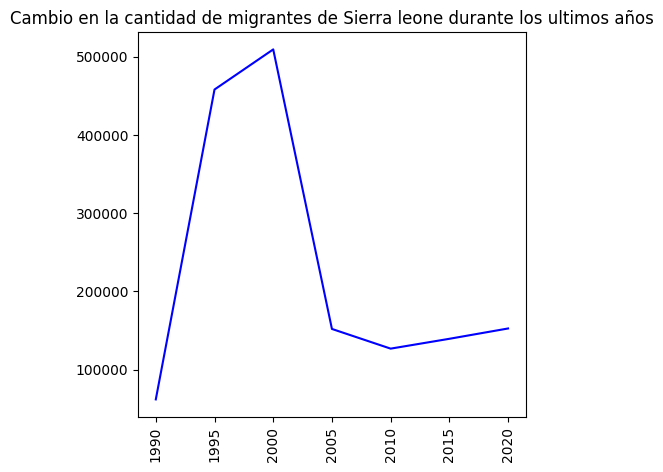

In [186]:
fig, ax = plt.subplots(figsize=(5,5))

sierra = filtro_regiones.loc[filtro_regiones['Region, development group, country or area'] == 'sierra leone', '1990':'2020']
ax.plot(sierra.values[0], color='blue')
ax.set_title('Cambio en la cantidad de migrantes de Sierra leone durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17692\1582085098.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


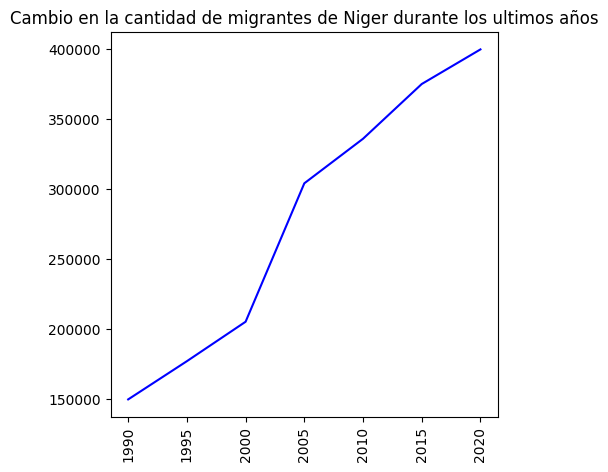

In [188]:
fig, ax = plt.subplots(figsize=(5,5))

niger = filtro_regiones.loc[filtro_regiones['Region, development group, country or area'] == 'niger', '1990':'2020']
ax.plot(niger.values[0], color='blue')
ax.set_title('Cambio en la cantidad de migrantes de Niger durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17692\1575532294.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


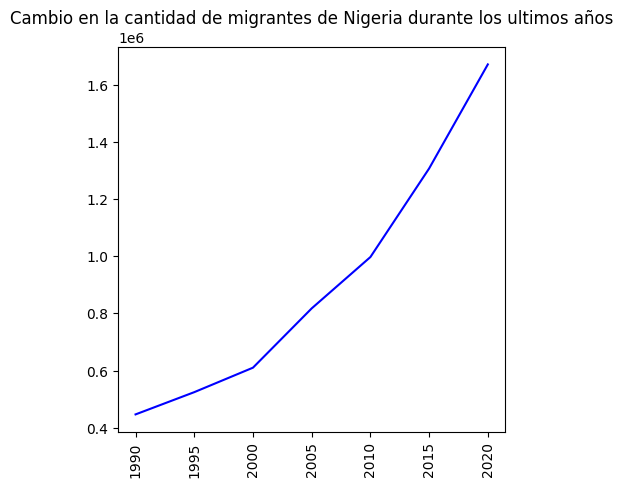

In [189]:
fig, ax = plt.subplots(figsize=(5,5))

nigeria = filtro_regiones.loc[filtro_regiones['Region, development group, country or area'] == 'nigeria', '1990':'2020']
ax.plot(nigeria.values[0], color='blue')
ax.set_title('Cambio en la cantidad de migrantes de Nigeria durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17692\3923201202.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


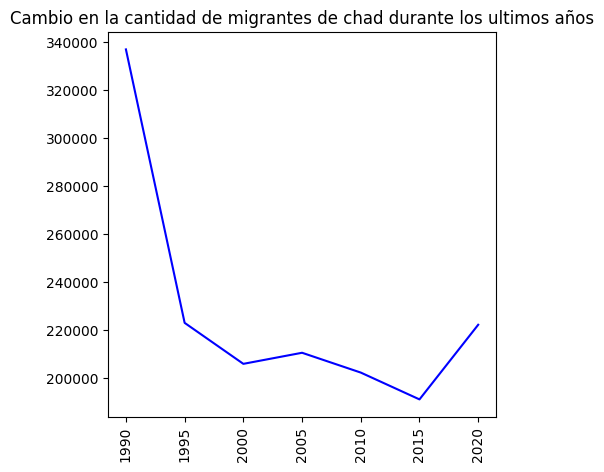

In [191]:
fig, ax = plt.subplots(figsize=(5,5))

chad = filtro_regiones.loc[filtro_regiones['Region, development group, country or area'] == 'chad', '1990':'2020']
ax.plot(chad.values[0], color='blue')
ax.set_title('Cambio en la cantidad de migrantes de chad durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17692\2313448657.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


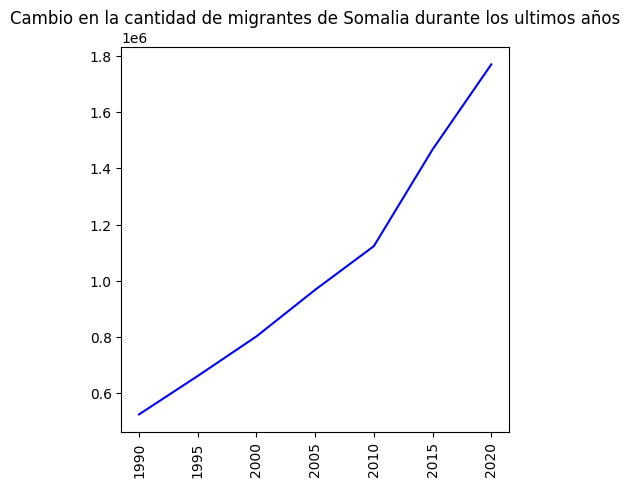

In [192]:
fig, ax = plt.subplots(figsize=(5,5))

haiti = filtro_regiones.loc[filtro_regiones['Region, development group, country or area'] == 'haiti', '1990':'2020']
ax.plot(haiti.values[0], color='blue')
ax.set_title('Cambio en la cantidad de migrantes de Somalia durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.show()

podemos visualizar como al pasar de los años el numero de migrantes de estos paises con más muertes en niños de de 5 a 9 años a venido en aumento, podria ser una de las causas de estos flujos migratorios en estas regiones más debastadas por la pobreza y el abandono

In [52]:
#Veamos si las muertes de estos infantes esta relacionada a la fertilidad en embarazo precoz teniendo las madres entre los 15-19 

correlacion = filtro1990['Adolescent fertility rate (births per 1,000 women ages 15-19)'].corr(filtro1990['Probability of dying among children ages 5-9 years (per 1,000)'])

In [53]:
correlacion

0.7036927970616338

Si llega a interesar en nuestro analisis esto podria ser una de las causas de la muerte en infantes ya que la correlacion fue positiva aunque no siempre la correlacion implique causalidad habria que ver si se necesita se podria evaluar este caso.

                Analisis del indicador de la media personas desde los 15 años que viven con VIH

In [54]:
serie3_1990 = (
    filtro1990
    .groupby('Country Name')['Adults (ages 15+) living with HIV']
    .mean()
    .reset_index()
    .sort_values(by='Adults (ages 15+) living with HIV', ascending=False)
)

In [55]:
serie3_1990.head()

,Country Name,Adults (ages 15+) living with HIV
216,Zimbabwe,740000.0
201,Uganda,740000.0
190,"Tanzania, united republic of",630000.0
143,Nigeria,520000.0
100,Kenya,490000.0


In [62]:
serie3_2010 = (
    filtro2010
    .groupby('Country Name')['Adults (ages 15+) living with HIV']
    .mean()
    .reset_index()
    .sort_values(by='Adults (ages 15+) living with HIV', ascending=False)
)

In [63]:
serie3_2010.head()

,Country Name,Adults (ages 15+) living with HIV
176,South africa,5000000.0
143,Nigeria,1500000.0
190,"Tanzania, united republic of",1200000.0
100,Kenya,1200000.0
216,Zimbabwe,1100000.0


In [66]:
serie3_2020 = (
    filtro2020
    .groupby('Country Name')['Adults (ages 15+) living with HIV']
    .mean()
    .reset_index()
    .sort_values(by='Adults (ages 15+) living with HIV', ascending=False)
)

In [67]:
serie3_2020.head()

,Country Name,Adults (ages 15+) living with HIV
176,South africa,7100000.0
143,Nigeria,1700000.0
190,"Tanzania, united republic of",1600000.0
201,Uganda,1300000.0
100,Kenya,1300000.0


Se puede apreciar que a medida que aumentan los años los casos en personas contagiadas con el virus del sida fue aumentando cada vez mas, sobretodo en estas regiones de Africa.

                                    Análisis del indicador de muertes por cada 1000 personas

In [68]:
serie4_1990 = (
    filtro1990
    .groupby('Country Name')['Death rate, crude (per 1,000 people)']
    .mean()
    .reset_index()
    .sort_values(by='Death rate, crude (per 1,000 people)', ascending=False)
)

In [69]:
serie4_1990.head()

,Country Name,"Death rate, crude (per 1,000 people)"
177,South sudan,34.067
111,Liberia,25.501
142,Niger,24.067
118,Malawi,22.087
5,Angola,21.993


In [72]:
serie4_2000 = (
    filtro2000
    .groupby('Country Name')['Death rate, crude (per 1,000 people)']
    .mean()
    .reset_index()
    .sort_values(by='Death rate, crude (per 1,000 people)', ascending=False)
)

In [73]:
serie4_2000.head()

,Country Name,"Death rate, crude (per 1,000 people)"
169,Sierra leone,19.794
118,Malawi,19.559
177,South sudan,18.587
5,Angola,18.287
37,Chad,18.088


In [74]:
serie4_2005 = (
    filtro2005
    .groupby('Country Name')['Death rate, crude (per 1,000 people)']
    .mean()
    .reset_index()
    .sort_values(by='Death rate, crude (per 1,000 people)', ascending=False)
)

In [75]:
serie4_2005.head()

,Country Name,"Death rate, crude (per 1,000 people)"
110,Lesotho,20.605
62,Eswatini,18.845
169,Sierra leone,16.890
37,Chad,16.827
216,Zimbabwe,16.820


In [76]:
serie4_2010 = (
    filtro2010
    .groupby('Country Name')['Death rate, crude (per 1,000 people)']
    .mean()
    .reset_index()
    .sort_values(by='Death rate, crude (per 1,000 people)', ascending=False)
)

In [77]:
serie4_2010.head()

,Country Name,"Death rate, crude (per 1,000 people)"
110,Lesotho,18.644
83,Haiti,17.738
62,Eswatini,15.911
37,Chad,15.421
175,Somalia,15.358


In [78]:
serie4_2015 = (
    filtro2015
    .groupby('Country Name')['Death rate, crude (per 1,000 people)']
    .mean()
    .reset_index()
    .sort_values(by='Death rate, crude (per 1,000 people)', ascending=False)
)

In [79]:
serie4_2015.head()

,Country Name,"Death rate, crude (per 1,000 people)"
28,Bulgaria,15.300
202,Ukraine,14.900
110,Lesotho,14.825
167,Serbia,14.600
108,Latvia,14.400


Ukrania aparece segundo en la tabla se debe quizas a que durante el 2014 empezo una operación de desestabilizacion de parte de Russia 
punto muy bueno para evaluar los flujos migratorios.

In [118]:
filtro_Ukrania = emigrantes[emigrantes['Region, development group, country or area'] == 'ukraine']

In [119]:
filtro_Ukrania

,"Region, development group, country or area",Location code,1990,1995,2000,2005,2010,2015,2020
120,ukraine,804,5545517,5606133,5596518,5566382,5429876,5797550,6139144


Se puede ver un cambio significativo en la cantidad de migrantes de Ukrania desde el año 2015 hasta el 2020 producto de el aumento en número de muertes durante el 2015, muchos ciudadanos de Ukrania empezaron a emigrar.

In [125]:
filtro_muertes = serie4_2015.head(5)

<AxesSubplot: xlabel='Country Name'>

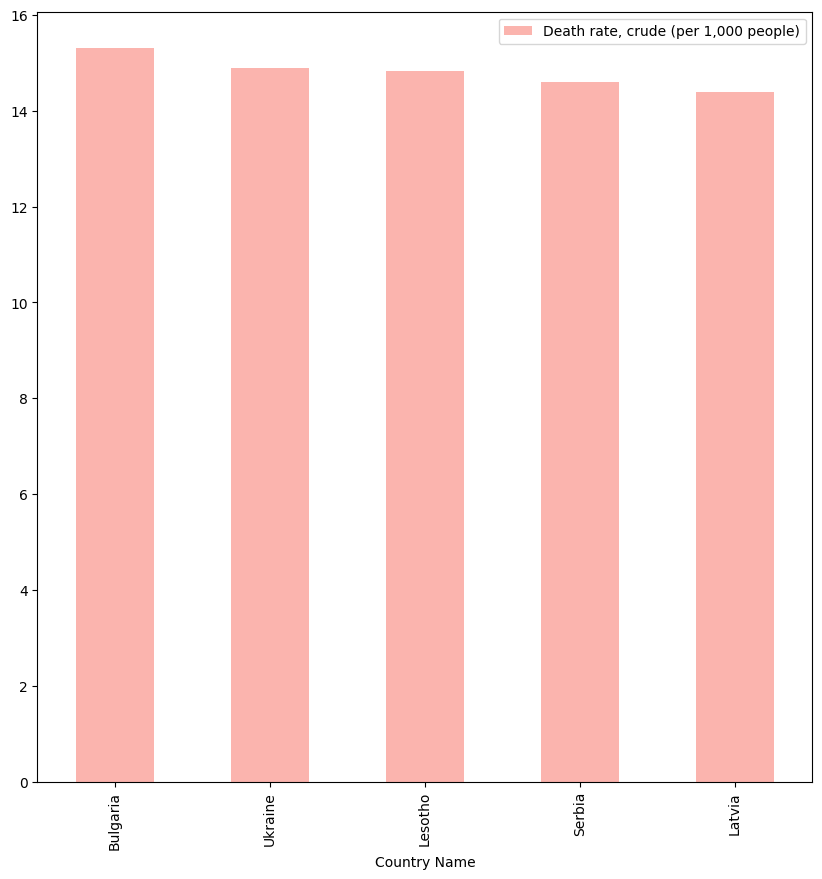

In [131]:
filtro_muertes.set_index('Country Name').plot.bar(y='Death rate, crude (per 1,000 people)', figsize=(10,10),colormap='Pastel1')

Se puede apreciar visualmente como Ukranie aparece de segundo en el grafico con mas indices de muertes por cada mil habitantes durante el 2015

In [80]:
serie4_2020 = (
    filtro2020
    .groupby('Country Name')['Death rate, crude (per 1,000 people)']
    .mean()
    .reset_index()
    .sort_values(by='Death rate, crude (per 1,000 people)', ascending=False)
)

In [81]:
serie4_2020.head()

,Country Name,"Death rate, crude (per 1,000 people)"
28,Bulgaria,18.0
167,Serbia,16.9
202,Ukraine,15.9
114,Lithuania,15.6
159,Romania,15.4


                                Analisis de muertes atribuida al uso de agua insalubre y falta de higiene

In [82]:
serie4_2020 = (
    filtro2020
    .groupby('Country Name')['Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)']
    .mean()
    .reset_index()
    .sort_values(by='Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)', ascending=False)
)

In [150]:
serie4_2020['Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)'].unique()

array([0.])

no hay datos en la columna (Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)) se borrarará del dataframe

In [84]:
data_transpuesta.drop(columns={'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)'}, inplace=True)

Breve analisis de lo que se ha visto hasta ahora. 

Los indicadores de muertes y enfermedades graves casi siempre apuntan a estos paises con altos indices de pobreza historicos como lo son los paises Africanos donde hay muy poco acceso a la salud, estan espuestos a enfermedades cronicas y a vivir con ellas como es es caso de la gran cantidad de personas que viven con VIH en estos paises.

